# Problem Set 05
Authors: \
Dawid Włosek \
Julia Zezula

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 01

In [40]:
def wigner_density(x):
    dens = np.zeros_like(x)
    mask = np.abs(x) <= 2
    dens[mask] = (1/(2*np.pi)) * np.sqrt(4 - x[mask]**2)
    return dens

In [41]:
def simulate_goe(num_realizations, N, omit_sqrt=False):
    ev = np.empty(num_realizations * N)
    scale = 2 * (np.sqrt(N) if not omit_sqrt else 1.0)
    for k in range(num_realizations):
        A = np.random.normal(loc=0.0, scale=np.sqrt(2), size=(N,N))
        X = (A + A.T) / scale
        ev[k*N:(k+1)*N] = np.linalg.eigvalsh(X)
    return ev

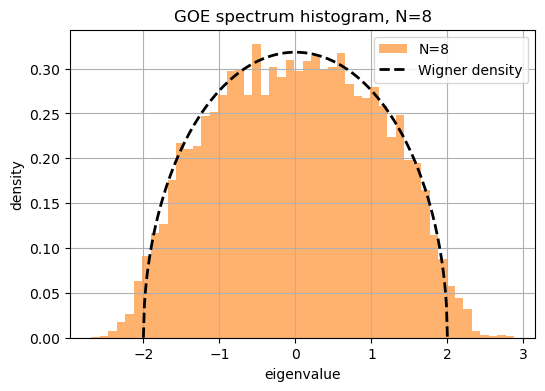

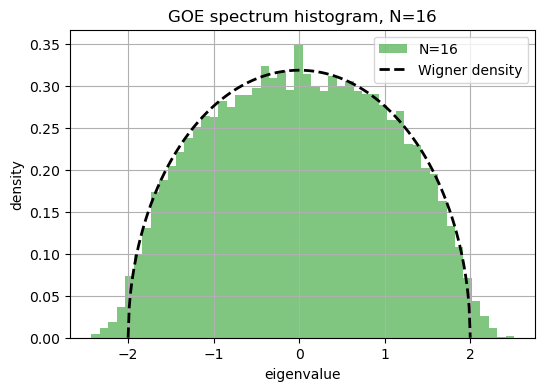

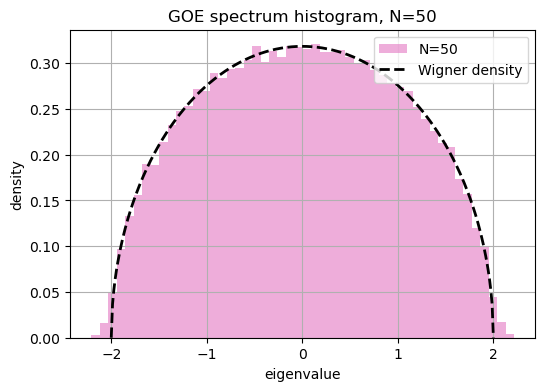

In [42]:
M = 1000
for N in [8, 16, 50]:
    eigenvalues = simulate_goe(M, N)
    # histogram
    plt.figure(figsize=(6,4))
    counts, bins, _ = plt.hist(eigenvalues, bins=50, density=True,
                               alpha=0.6, color='C{}'.format((N//8)%10),
                               label=f'N={N}')
    # overlay theory
    x = np.linspace(-2,2,300)
    plt.plot(x, wigner_density(x), 'k--', lw=2, label='Wigner density')
    plt.xlabel('eigenvalue')
    plt.ylabel('density')
    plt.title(f'GOE spectrum histogram, N={N}')
    plt.legend()
    plt.grid(True)
    plt.show()

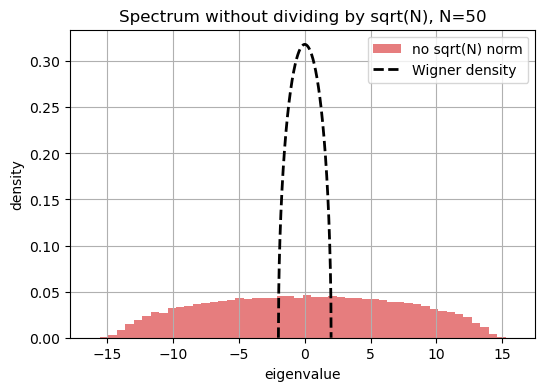

In [43]:
# simulate without sqrt(N) normalization
N = 50
eigen_no_norm = simulate_goe(M, N, omit_sqrt=True)

plt.figure(figsize=(6,4))
plt.hist(eigen_no_norm, bins=50, density=True,
         alpha=0.6, color='C3', label='no sqrt(N) norm')

# overlay standard semicircle for reference
x = np.linspace(-2,2,300)
plt.plot(x, wigner_density(x), 'k--', lw=2, label='Wigner density')
plt.xlabel('eigenvalue')
plt.ylabel('density')
plt.title('Spectrum without dividing by sqrt(N), N=50')
plt.legend()
plt.grid(True)
plt.show()

If one neglects the factor $\sqrt{N}$, the eigenvalue distribution does not match the Wigner semicircle law. Instead, the spectrum spreads out over an interval proportional to $\sqrt{N}$, and the limiting distribution becomes a "stretched" semicircle with width $\sim 2 \sqrt{2N}$.

## Problem 02

In [44]:
M = 1000
N = 100
K = 10

def catalan(n):
    return math.comb(2*n, n) // (n+1)

# build analytic moments up to K−1
m_analytic = []
for k in range(K):
    if k % 2 == 1:
        m_analytic.append(0.0)
    else:
        n = k // 2
        m_analytic.append(catalan(n))

In [45]:
# simulate and collect eigenvalues
eigenvalues = simulate_goe(M, N)  

# compute empirical moments
m_emp = []
for k in range(K):
    m_emp.append(np.mean(eigenvalues**k))

In [46]:
print(f"{'k':>2} {'m_empirical':>12} {'m_analytic':>12}")
for k in range(K):
    print(f"{k:2d} {m_emp[k]:12.6f} {m_analytic[k]:12.6f}")

 k  m_empirical   m_analytic
 0     1.000000     1.000000
 1    -0.000870     0.000000
 2     1.008934     1.000000
 3    -0.001345     0.000000
 4     2.045295     2.000000
 5    -0.002624     0.000000
 6     5.206682     5.000000
 7    -0.004655     0.000000
 8    14.905509    14.000000
 9     0.001475     0.000000


## Problem 03

In [47]:
samplers = {
    "Gaussian":    lambda size: np.random.normal(loc=0.0, scale=np.sqrt(2), size=size),
    "Uniform":     lambda size: np.random.uniform(-np.sqrt(6), np.sqrt(6), size=size),
    "Rademacher":  lambda size: np.sqrt(2) * np.random.choice([-1,1], size=size)
}

In [48]:
def simulate_wigner(num_realizations, N, sampler, omit_sqrt=False):
    ev = np.empty(num_realizations * N)
    scale = 2 * (np.sqrt(N) if not omit_sqrt else 1.0)
    for k in range(num_realizations):
        A = sampler((N, N))
        X = (A + A.T) / scale
        ev[k*N:(k+1)*N] = np.linalg.eigvalsh(X)
    return ev

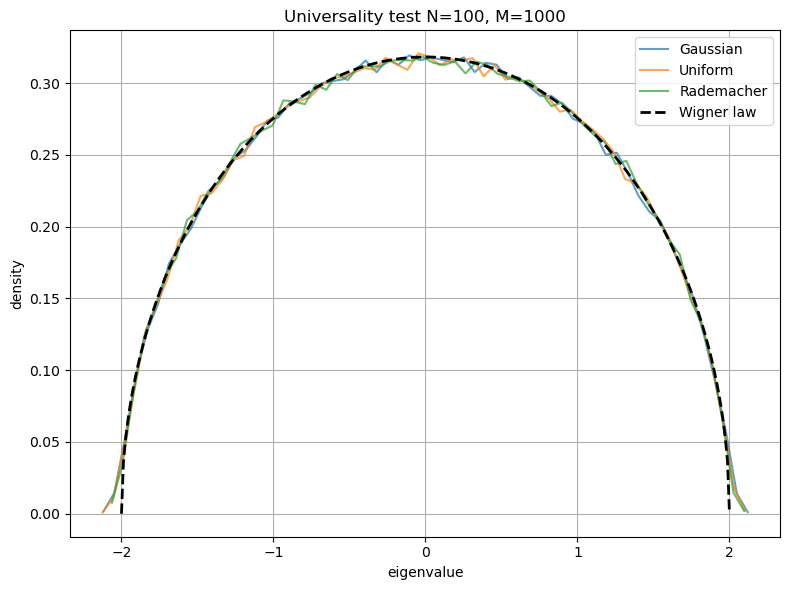

In [49]:
N = 100
M = 1000
x = np.linspace(-2, 2, 300)

plt.figure(figsize=(8,6))
for name, sampler in samplers.items():
    ev = simulate_wigner(M, N, sampler)
    counts, bins = np.histogram(ev, bins=60, density=True)
    centers = 0.5*(bins[:-1] + bins[1:])
    plt.plot(centers, counts, label=name, alpha=0.7)

# overlay theoretical curve
plt.plot(x, wigner_density(x), 'k--', lw=2, label='Wigner law')
plt.xlabel('eigenvalue')
plt.ylabel('density')
plt.title(f'Universality test N={N}, M={M}')
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()